## Importing Libraries

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import DataFrame
from datetime import datetime

## Loading Dataset

In [2]:
data_directory = "D:\my_folders\COMPUTER SCIENCE AND ENGINEERING\machine_learning\projects\zeotap_internship_assignment\data"

In [3]:
df_customers_path = os.path.join(data_directory, "Customers.csv")
df_products_path = os.path.join(data_directory, "Products.csv")
df_transactions_path = os.path.join(data_directory, "Transactions.csv")

In [79]:
df_customers = pd.read_csv(df_customers_path)
df_products = pd.read_csv(df_products_path)
df_transactions = pd.read_csv(df_transactions_path)

### Customers

In [47]:
df_customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [18]:
df_customers.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2022-04-16
freq,1,1,59,3


In [11]:
df_customers['Region'].value_counts()

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64

In [13]:
missing_values_customers = df_customers.isnull().sum()
print("Missing values in df_customers:")
print(missing_values_customers)

Missing values in df_customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


### Products

In [8]:
df_products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [17]:
df_products.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [9]:
df_products['Category'].value_counts()

Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64

In [12]:
# Check for missing values in df_products
missing_values_products = df_products.isnull().sum()
print("\nMissing values in df_products:")
print(missing_values_products)


Missing values in df_products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


### Transactions

In [10]:
df_transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 7:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [16]:
df_transactions.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [14]:
# Check for missing values in df_transactions
missing_values_transactions = df_transactions.isnull().sum()
print("\nMissing values in df_transactions:")
print(missing_values_transactions)


Missing values in df_transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


## EDA

In [80]:
df_transactions['TransactionDate'].min()

'2023-12-30 15:29:12'

In [81]:
df_customers["SignupDate"].min()

'2022-01-22'

In [82]:
reference_date = datetime.strptime("2022-01-22-00-00-00", '%Y-%m-%d-%H-%M-%S')

In [83]:
def preprocess_customers(df: DataFrame) -> DataFrame:
    
    df["SignupDate"] = pd.to_datetime(df["SignupDate"], format="%Y-%m-%d")
    df["Days_sign_up"] = (df["SignupDate"] - reference_date).dt.days
    df.drop(columns=["SignupDate"], inplace=True)
    
    return df

In [84]:
def preprocess_transactions(df: DataFrame) -> DataFrame:
    
    df["TransactionDate"] = pd.to_datetime(df["TransactionDate"], format="%Y-%m-%d %H:%M:%S")
    df["Days_transaction"] = (df["TransactionDate"] - reference_date).dt.days
    df.drop(columns=["TransactionDate"], inplace=True)
    
    return df

In [85]:
df_customers = preprocess_customers(df_customers)
df_transactions = preprocess_transactions(df_transactions)

In [86]:
df_customers.head()

,CustomerID,CustomerName,Region,Days_sign_up
0,C0001,Lawrence Carroll,South America,169
1,C0002,Elizabeth Lutz,Asia,22
2,C0003,Michael Rivera,South America,775
3,C0004,Kathleen Rodriguez,South America,260
4,C0005,Laura Weber,Asia,205


In [92]:
df_products.rename(columns={"Price": "ProductPrice"}, inplace=True)
df_products.head()

,ProductID,ProductName,Category,ProductPrice
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [93]:
df_transactions.rename(columns={"Price": "TransactionPrice"}, inplace=True)
df_transactions.head()

,TransactionID,CustomerID,ProductID,Quantity,TotalValue,TransactionPrice,Days_transaction
0,T00001,C0199,P067,1,300.68,300.68,946
1,T00112,C0146,P067,1,300.68,300.68,856
2,T00166,C0127,P067,1,300.68,300.68,824
3,T00272,C0087,P067,2,601.36,300.68,794
4,T00363,C0070,P067,3,902.04,300.68,789


### Merging the Dataframes

In [94]:
merged_df = pd.merge(df_transactions, df_customers, on="CustomerID")
merged_df = pd.merge(merged_df, df_products, on="ProductID")

In [95]:
merged_df.head()

,TransactionID,CustomerID,ProductID,Quantity,TotalValue,TransactionPrice,Days_transaction,CustomerName,Region,Days_sign_up,ProductName,Category,ProductPrice
0,T00001,C0199,P067,1,300.68,300.68,946,Andrea Jenkins,Europe,315,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,1,300.68,300.68,856,Brittany Harvey,Asia,956,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,1,300.68,300.68,824,Kathryn Stevens,Europe,803,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2,601.36,300.68,794,Travis Campbell,South America,810,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,3,902.04,300.68,789,Timothy Perez,Europe,52,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [96]:
merged_df.isnull().sum()

TransactionID       0
CustomerID          0
ProductID           0
Quantity            0
TotalValue          0
TransactionPrice    0
Days_transaction    0
CustomerName        0
Region              0
Days_sign_up        0
ProductName         0
Category            0
ProductPrice        0
dtype: int64

In [26]:
merged_df.to_csv(data_directory + "/merged_data.csv", index=False)

In [27]:
merged_data_path = os.path.join(data_directory, "merged_data.csv")
merged_df = pd.read_csv(merged_data_path)

In [28]:
merged_df.head()

,TransactionID,CustomerID,ProductID,Quantity,TotalValue,Days_transaction,CustomerName,Region,Days_sign_up,ProductName,Category,ProductPrice
0,T00001,C0199,P067,1,300.68,946,Andrea Jenkins,Europe,315,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,1,300.68,856,Brittany Harvey,Asia,956,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,1,300.68,824,Kathryn Stevens,Europe,803,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2,601.36,794,Travis Campbell,South America,810,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,3,902.04,789,Timothy Perez,Europe,52,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [35]:
len(merged_df["ProductName"].unique())

66

In [24]:
merged_df.drop(columns = ["TransactionPrice"], axis=1, inplace=True)

In [25]:
merged_df.describe()

,Quantity,TotalValue,Days_transaction,Days_sign_up,ProductPrice
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,883.141000,533.118000,272.55407
std,1.117981,493.144478,104.624306,328.877102,140.73639
min,1.000000,16.080000,707.000000,0.000000,16.08000
25%,2.000000,295.295000,793.750000,238.500000,147.95000
50%,3.000000,588.880000,886.000000,547.000000,299.93000
75%,4.000000,1011.660000,971.000000,811.000000,404.40000
max,4.000000,1991.040000,1071.000000,1071.000000,497.76000


In [38]:
merged_df['Region'].value_counts()

Region
South America    304
North America    244
Europe           234
Asia             218
Name: count, dtype: int64

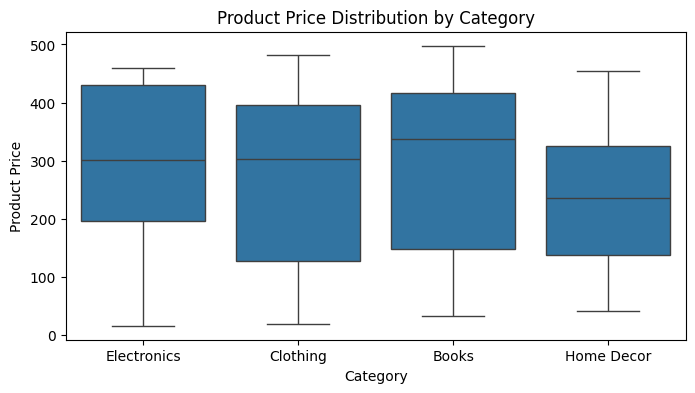

In [19]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=merged_df, x='Category', y='ProductPrice')
plt.title('Product Price Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Product Price')
plt.xticks(rotation=0)
plt.show()

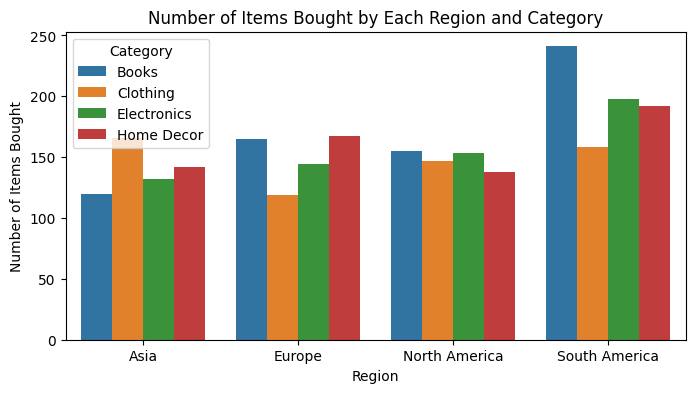

In [32]:
# Group by Region and Category
grouped_by_region_category = merged_df.groupby(['Region', 'Category'])['Quantity'].sum().reset_index()

# Plot the data
plt.figure(figsize=(8, 4))
sns.barplot(data=grouped_by_region_category, x='Region', y='Quantity', hue='Category')
plt.title('Number of Items Bought by Each Region and Category')
plt.xlabel('Region')
plt.ylabel('Number of Items Bought')
plt.xticks(rotation=0)
plt.legend(title='Category')
plt.show()

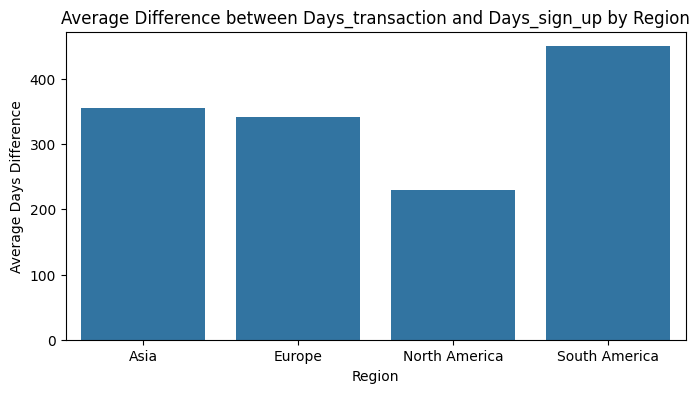

In [ ]:
# Calculate the difference between Days_transaction and Days_sign_up
merged_df['Days_decision'] = merged_df['Days_transaction'] - merged_df['Days_sign_up']

# Group by Region and calculate the mean of Days_diff
grouped_by_region_Days_decision= merged_df.groupby('Region')['Days_decision'].mean().reset_index()

# Plot the data
plt.figure(figsize=(8, 4))
sns.barplot(data=grouped_by_region_Days_decision, x='Region', y='Days_decision')
plt.title('Difference between Days_transaction and Days_sign_up by Region')
plt.xlabel('Region')
plt.ylabel('Days Difference')
plt.xticks(rotation=0)
plt.show()

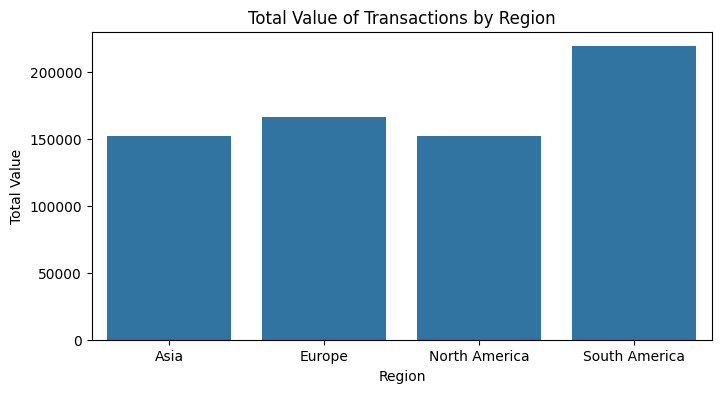

In [39]:
# Group by Region and calculate the sum of TotalValue
grouped_by_region_totalvalue = merged_df.groupby('Region')['TotalValue'].sum().reset_index()

# Plot the data
plt.figure(figsize=(8, 4))
sns.barplot(data=grouped_by_region_totalvalue, x='Region', y='TotalValue')
plt.title('Total Value of Transactions by Region')
plt.xlabel('Region')
plt.ylabel('Total Value')
plt.xticks(rotation=0)
plt.show()

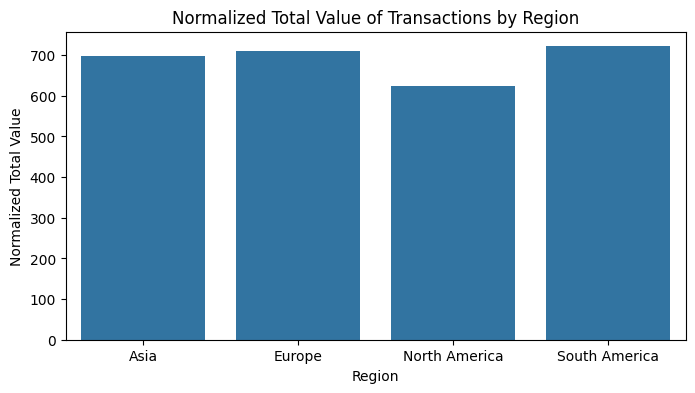

In [48]:
# Calculate the total value and normalize by the number of occurrences of each region
normalized_totalvalue = merged_df.groupby('Region')['TotalValue'].sum() / merged_df['Region'].value_counts()

# Convert the result to a DataFrame for plotting
normalized_totalvalue_df = normalized_totalvalue.reset_index()
normalized_totalvalue_df.columns = ['Region', 'NormalizedTotalValue']

# Plot the data
plt.figure(figsize=(8, 4))
sns.barplot(data=normalized_totalvalue_df, x='Region', y='NormalizedTotalValue')
plt.title('Normalized Total Value of Transactions by Region')
plt.xlabel('Region')
plt.ylabel('Normalized Total Value')
plt.xticks(rotation=0)
plt.show()

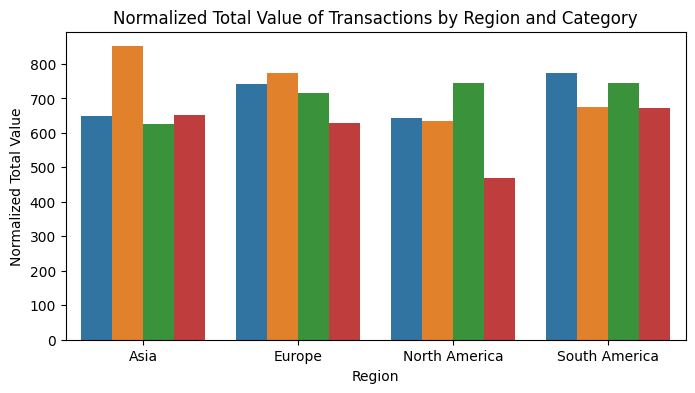

In [58]:
# Calculate the total value and normalize by the number of occurrences of each region and category
normalized_totalvalue_category = merged_df.groupby(['Region', 'Category'])['TotalValue'].sum() / merged_df.groupby(['Region', 'Category'])['Category'].count()

# Convert the result to a DataFrame for plotting
normalized_totalvalue_category_df = normalized_totalvalue_category.reset_index()
normalized_totalvalue_category_df.columns = ['Region', 'Category', 'NormalizedTotalValue']

# Plot the data
plt.figure(figsize=(8, 4))
sns.barplot(data=normalized_totalvalue_category_df, x='Region', y='NormalizedTotalValue', hue='Category')
plt.title('Normalized Total Value of Transactions by Region and Category')
plt.xlabel('Region')
plt.ylabel('Normalized Total Value')
plt.xticks(rotation=0)
plt.legend([], [], frameon=False)
plt.show()


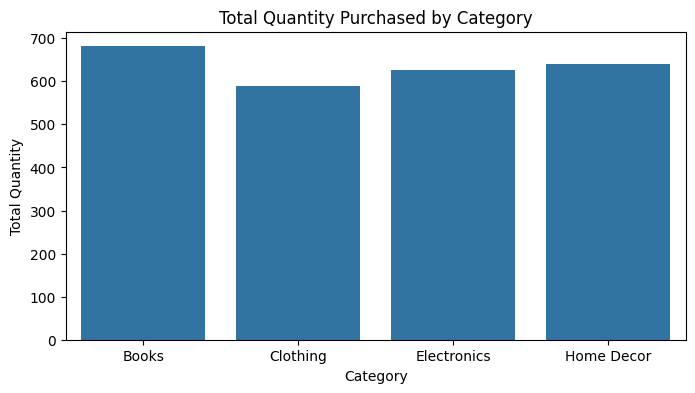

In [61]:
# Group by Category and sum the Quantity
grouped_by_category = merged_df.groupby('Category')['Quantity'].sum().reset_index()

# Plot the data
plt.figure(figsize=(8, 4))
sns.barplot(data=grouped_by_category, x='Category', y='Quantity')
plt.title('Total Quantity Purchased by Category')
plt.xlabel('Category')
plt.ylabel('Total Quantity')
plt.xticks(rotation=0)
plt.show()